In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
# Loading the dataset
file_path = r"C:\Users\ava\AppData\Local\Temp\30f8c44a-afae-43d3-9c13-3c7d2fc96c96_archive (70)(1).zip.archive (70)(1).zip\Student_performance_10k.csv"
data = pd.read_csv(file_path)
print(data.head())  
data.info()         


  roll_no gender race_ethnicity parental_level_of_education  lunch  \
0  std-01   male        group D                some college    1.0   
1  std-02   male        group B                 high school    1.0   
2  std-03   male        group C             master's degree    1.0   
3  std-04   male        group D                some college    1.0   
4  std-05   male        group C                some college    0.0   

   test_preparation_course math_score  reading_score  writing_score  \
0                      1.0         89           38.0           85.0   
1                      0.0         65          100.0           67.0   
2                      0.0         10           99.0           97.0   
3                      1.0         22           51.0           41.0   
4                      1.0         26           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2           58.0        264.0     B  


In [5]:
# Check for non-numeric values in the relevant columns
print(data[['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']].dtypes)

# Show problematic rows if any non-numeric values are found
print(data[data['math_score'].str.contains(r'\D', na=False)])  # Non-digit characters in math_score


math_score        object
reading_score    float64
writing_score    float64
science_score    float64
total_score      float64
dtype: object
       roll_no gender race_ethnicity parental_level_of_education  lunch  \
2865  std-2866   male        group B                some college    0.0   

      test_preparation_course math_score  reading_score  writing_score  \
2865                      1.0       \t41           71.0          100.0   

      science_score  total_score grade  
2865           74.0        286.0     B  


In [6]:
# Convert columns to numeric, replacing non-numeric values with NaN
data['math_score'] = pd.to_numeric(data['math_score'], errors='coerce')
data['reading_score'] = pd.to_numeric(data['reading_score'], errors='coerce')
data['writing_score'] = pd.to_numeric(data['writing_score'], errors='coerce')
data['science_score'] = pd.to_numeric(data['science_score'], errors='coerce')
data['total_score'] = pd.to_numeric(data['total_score'], errors='coerce')

# Fill or drop NaN values (You can choose filling method depending on your preference)
data = data.dropna(subset=['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score'])
# Clean string columns by stripping leading/trailing whitespace
data['gender'] = data['gender'].str.strip()
data['race_ethnicity'] = data['race_ethnicity'].str.strip()
data['parental_level_of_education'] = data['parental_level_of_education'].str.strip()


In [7]:
# Selecting varibels for clustering (test scores and total score)
X = data[['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']]

# Standardize data (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering for different values of k
inertia_values = []
silhouette_scores_values = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores_values.append(silhouette_score(X_scaled, kmeans.labels_))

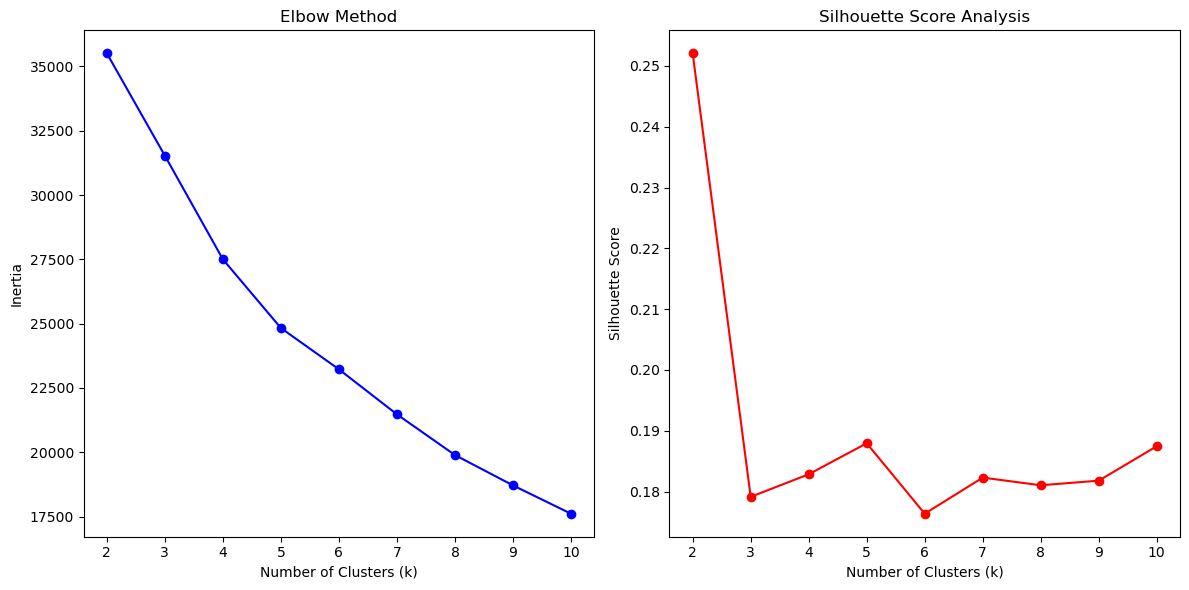

In [8]:
#Elbow Method Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')


plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_values, marker='o', linestyle='-', color='r')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

